In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 8})

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# I. LOAD DATA

In [3]:
train = pd.read_csv('./Data/train_clean.csv') 

In [4]:
train.head()

,Unnamed: 0,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,Num_Bathrms,log_SalePrice,hasBsmt,hasGarage
0,0,0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,3,1,Gd,8,Typ,0,NoFirePlace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500,5,5,3,12.247694,Basement,Garage
1,1,1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500,31,31,2,12.109011,Basement,Garage
2,2,2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500,7,6,3,12.317167,Basement,Garage
3,3,3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36,1,11.849398,Basement,Garage
4,4,4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000,8,8,3,12.429216,Basement,Garage


In [5]:
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('index', axis=1)

In [6]:
# Ensure these variabes are categorical
train['MSSubClass'] = train['MSSubClass'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)

In [7]:
train.shape[0]

1449

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,Num_Bathrms,log_SalePrice,hasBsmt,hasGarage
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,3,1,Gd,8,Typ,0,NoFirePlace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500,5,5,3,12.247694,Basement,Garage
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500,31,31,2,12.109011,Basement,Garage
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500,7,6,3,12.317167,Basement,Garage
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36,1,11.849398,Basement,Garage
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000,8,8,3,12.429216,Basement,Garage


## The Variables

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train.select_dtypes(include=numerics)
numlist_all = list(num_train)
print(len(numlist_all),' numerical variables')
print(list(numlist_all))

34  numerical variables
['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeHome', 'YrsSinceRemodel', 'Num_Bathrms', 'log_SalePrice']


In [10]:
cattypes = ['O']
cat_train = train.select_dtypes(include=cattypes)
catlist_all = list(cat_train)
print(len(catlist_all),' categorical variables')
print(catlist_all)

48  categorical variables
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'hasBsmt', 'hasGarage']


# II. Preprocessing 

#### 1. Separate the input and output variable(s): create new dataframes

In [11]:
# Remove 'SalePrice' and 'Id' from the numlist
numlist_all.remove('SalePrice')
numlist_all.remove('log_SalePrice')
numlist_all.remove('Id')

In [12]:
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

numlist = list()
corr_thrshld = 0.15

for nvar in numlist_all:
       
    r = ma.corrcoef(ma.masked_invalid(train[nvar]), 
                ma.masked_invalid(train['log_SalePrice']))

    if np.abs(r[0,1]) >= corr_thrshld:
        
        numlist.append(nvar)

print('Original list had ', len(numlist_all),' numerical variables')
print('Reduced list has ', len(numlist),' numerical variables \n')
print(numlist)

Original list had  31  numerical variables
Reduced list has  22  numerical variables 

['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeHome', 'YrsSinceRemodel', 'Num_Bathrms']


In [13]:
# Remove other similar Numerical variables
# numlist.remove('Var')

In [14]:
#numlist = ['OverallQual','GrLivArea',
#           'TotalBsmtSF','FullBath',
#           'GarageCars','AgeHome',
#           'YrsSinceRemodel'] # testing

In [15]:
# Let's reduce the list of categorical variables
# For each variable, running an anova to determine 
      # if there is a significant difference in mean SalePrice 
      #  between the differenct options of the given variable
        
import statsmodels.api as sm
from statsmodels.formula.api import ols

catlist = list()

for cvar in catlist_all: 
    # Group Difference
    mstr = 'SalePrice ~ ' + cvar
    mod = ols(mstr,data=train).fit()                
    aov_table = sm.stats.anova_lm(mod, typ=2)
    
    eff_size_temp = (aov_table['sum_sq'][0])/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
    
    if aov_table['PR(>F)'][0] <= 0.01 and eff_size_temp > 0.059:
        catlist.append(cvar)

print('Original list had ', len(catlist_all),' categorical variables')
print('Reduced list has ', len(catlist),' categorical variables \n')
print(catlist)

Original list had  48  categorical variables
Reduced list has  26  categorical variables 

['MSSubClass', 'MSZoning', 'LotShape', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition', 'hasGarage']


In [16]:
# Remove other similar Categorical variables
# catlist.remove('Var')

In [17]:
#catlist = ['ExterQual', 'BsmtQual', 'KitchenQual',
#          'Neighborhood', 'MSZoning','BsmtCond',
#          'CentralAir','PoolQC'] # testing

In [18]:
# CONCATENATE!! the numerical and categorical
inputs_vars = numlist + catlist
print(inputs_vars)

['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeHome', 'YrsSinceRemodel', 'Num_Bathrms', 'MSSubClass', 'MSZoning', 'LotShape', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition', 'hasGarage']


In [19]:
PriceFeatures = train[inputs_vars].copy()

In [20]:
PriceFeatures.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,AgeHome,YrsSinceRemodel,Num_Bathrms,MSSubClass,MSZoning,LotShape,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition,hasGarage
0,65.0,8450,7,196.0,706,150,856,856,854,1710,1,3,1,8,0,2,548,0,61,5,5,3,60,RL,Reg,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Y,SBrkr,Gd,NoFirePlace,Attchd,RFn,TA,TA,WD,Normal,Garage
1,80.0,9600,6,0.0,978,284,1262,1262,0,1262,0,3,1,6,1,2,460,298,0,31,31,2,20,RL,Reg,Veenker,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,Y,SBrkr,TA,TA,Attchd,RFn,TA,TA,WD,Normal,Garage
2,68.0,11250,7,162.0,486,434,920,920,866,1786,1,3,1,6,1,2,608,0,42,7,6,3,60,RL,IR1,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,TA,WD,Normal,Garage
3,60.0,9550,7,0.0,216,540,756,961,756,1717,1,3,1,7,1,3,642,0,35,91,36,1,70,RL,IR1,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Y,SBrkr,Gd,Gd,Detchd,Unf,TA,TA,WD,Abnorml,Garage
4,84.0,14260,8,350.0,655,490,1145,1145,1053,2198,1,4,1,9,1,3,836,192,84,8,8,3,60,RL,IR1,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,TA,WD,Normal,Garage


##### Which Columns Are Numeric? Need this information later.

In [21]:
nlist = list(PriceFeatures.select_dtypes('number'))
print('Numerical Column Names: \n', nlist)

num_indx = []
for nvar in nlist:
    num_indx.append(PriceFeatures.select_dtypes('number').columns.get_loc(nvar))
    
print('\nNumerical Columns Indices: \n', num_indx)

Numerical Column Names: 
 ['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'AgeHome', 'YrsSinceRemodel', 'Num_Bathrms']

Numerical Columns Indices: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


##### The Dependent Variable 🎯

In [24]:
Price = train['SalePrice']

In [25]:
log_Price = train['log_SalePrice']

SalePrice is right skewed (left plot).
For the output/dependent variable, the log of SalePrice taken.
This is so the residuals of a linear model would be normal.


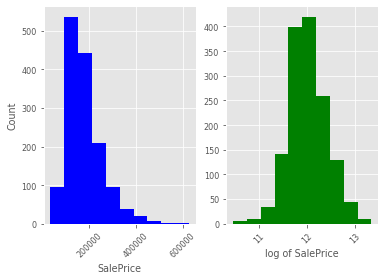

In [26]:
fig, axs = plt.subplots(1,2)   
axs[0].hist(Price,color='b')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylabel('Count')
axs[0].set_xlabel('SalePrice')
    
axs[1].hist(log_Price,color='g')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlabel('log of SalePrice')
print('SalePrice is right skewed (left plot).')
print('For the output/dependent variable, the log of SalePrice taken.')
print('This is so the residuals of a linear model would be normal.')

#### 2. Dummify the Categorical Variables

In [27]:
col_2_dummy = catlist
PriceFeatures = pd.get_dummies(PriceFeatures, 
                               columns=col_2_dummy, 
                               drop_first=True)

In [28]:
PriceFeatures.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,AgeHome,YrsSinceRemodel,Num_Bathrms,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePlace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,hasGarage_NoGarage
0,65.0,8450,7,196.0,706,150,856,856,854,1710,1,3,1,8,0,2,548,0,61,5,5,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,80.0,9600,6,0.0,978,284,1262,1262,0,1262,0,3,1,6,1,2,460,298,0,31,31,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,68.0,11250,7,162.0,486,434,920,920,866,1786,1,3,1,6,1,2,608,0,42,7,6,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### 3. Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    PriceFeatures, log_Price, test_size=0.2, 
    random_state=0)

In [30]:
X_train.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,AgeHome,YrsSinceRemodel,Num_Bathrms,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePlace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,hasGarage_NoGarage
476,105.0,13693,9,772.0,0,2153,2153,2069,574,2643,0,3,1,9,1,3,694,414,84,1,1,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
528,85.0,10200,6,219.0,783,678,1461,1509,0,1509,1,3,1,5,1,2,600,224,0,20,19,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
186,73.0,9947,7,0.0,611,577,1188,1217,0,1217,1,3,1,6,0,2,497,168,27,19,18,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,

#### 4. Standardize the numerical variables

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

t = [('num', StandardScaler(), num_indx)]
transf = ColumnTransformer(transformers=t,
                           remainder='passthrough')

In [32]:
X_train_scaled = transf.fit_transform(X_train)
X_test_scaled = transf.transform(X_test)

In [33]:
X_train_scaled.shape

(1159, 183)

<ipython-input-34-3f0e3c5f6e20>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,2)


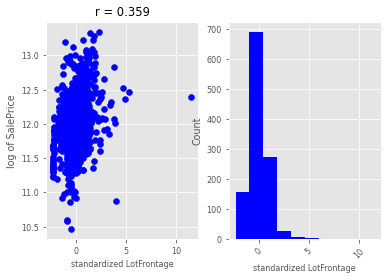

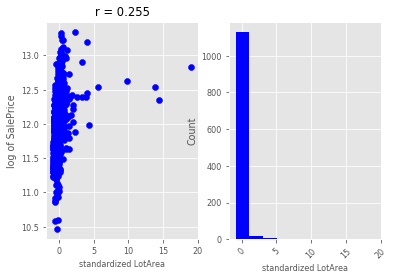

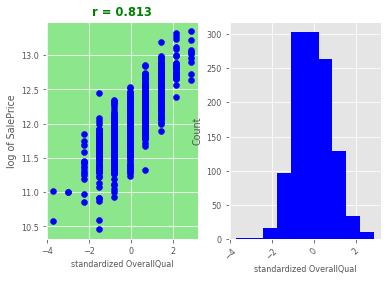

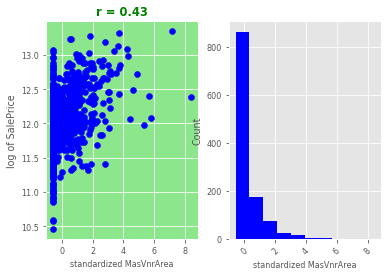

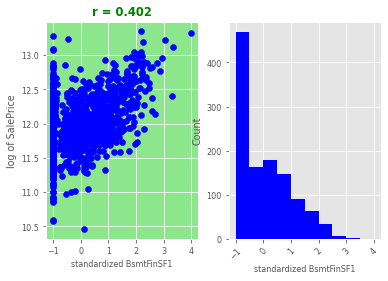

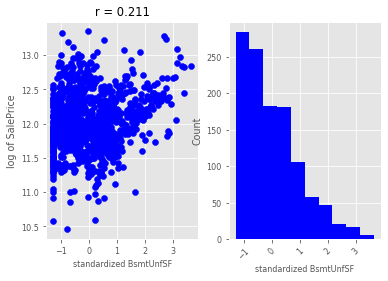

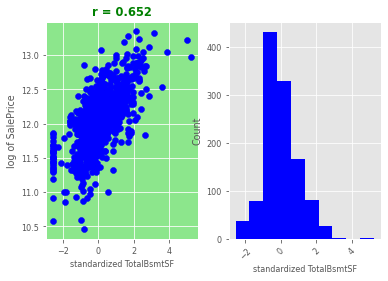

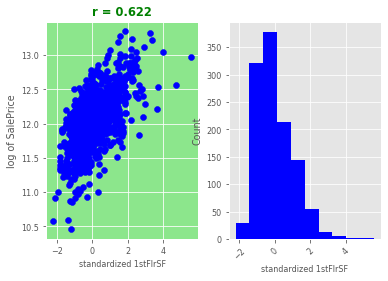

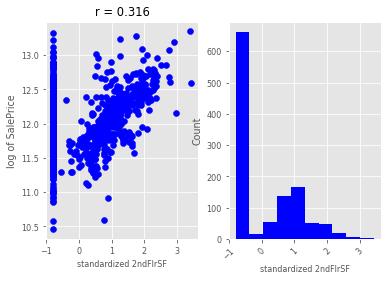

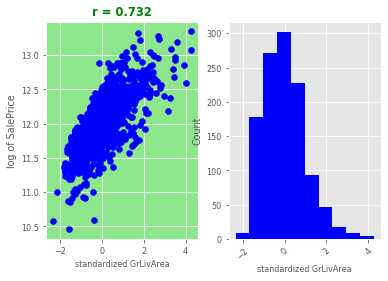

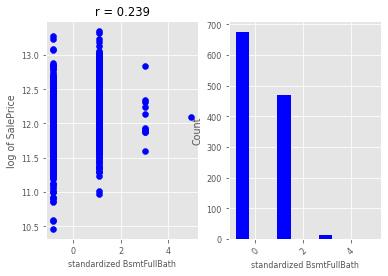

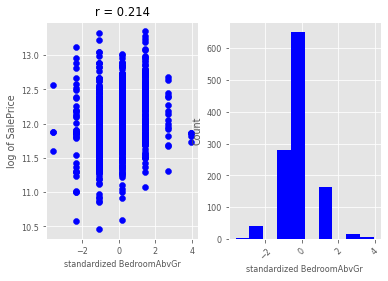

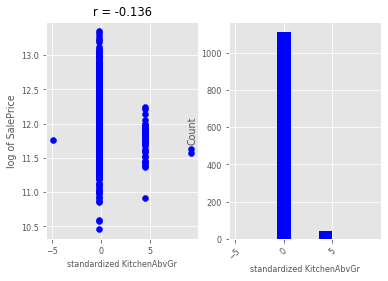

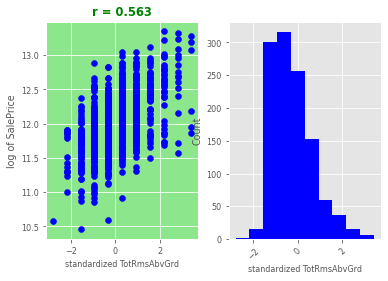

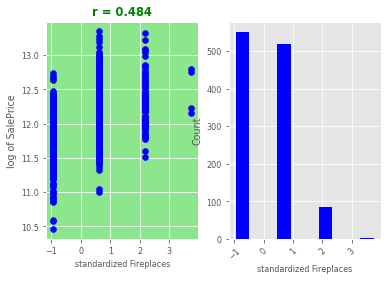

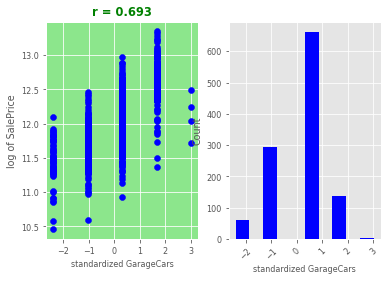

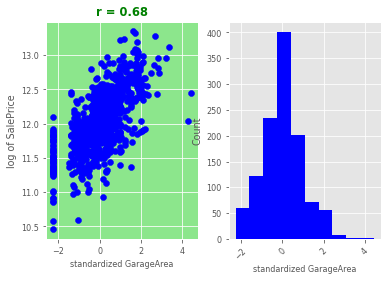

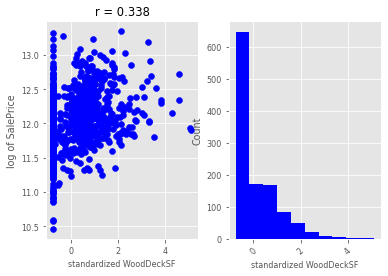

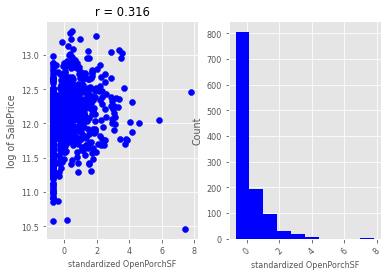

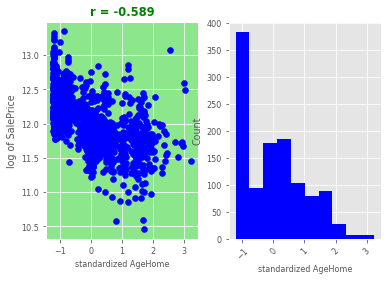

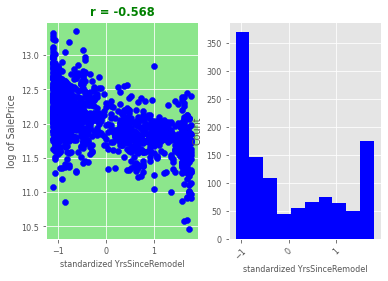

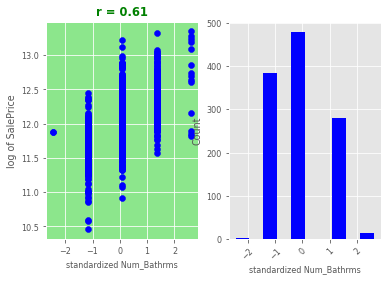

In [34]:
# plotting the standardized numerical variables vs.
     # log of SalePrice
    
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

# correlation threshold, used to highlight particular figures 
corr_thrshld = 0.4

fcnt = 0
for Feat in X_train.columns[num_indx]:
    fig, axs = plt.subplots(1,2) 
    x = X_train_scaled[:,fcnt]
    y = y_train
    
    axs[0].scatter(x,y,color='b')
    axs[0].set_xlabel('standardized ' + Feat,fontsize = 8)
    axs[0].set_ylabel('log of SalePrice')
    fcnt +=1
    
    r = ma.corrcoef(ma.masked_invalid(x), 
                ma.masked_invalid(y))
    
    if np.abs(r[0,1]) >= corr_thrshld:
        axs[0].set_title(('r = '+ str(round(r[0,1],3))), fontweight = 'bold',color='g')
        axs[0].set_facecolor('#8ce68c')
        
    elif np.abs(r[0,1]) < corr_thrshld:
        axs[0].set_title(('r = ' + str(round(r[0,1],3))))
        
    
    # Histogram
    axs[1].hist(x,color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel('standardized ' + Feat,fontsize = 8)

In [ ]:
# # How many Missing Values?
# PriceFeatures.isna().sum()

In [35]:
# initializing these variables for model comparision
model_descrp = []
r2_log_train = []
r2_log_test = []
rmse_log_train = []
rmse_log_test = []
rmse_train = []
rmse_test = []

# III. Train Models

## Model 1 : Multiple Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
print('R^2 for train is equal to %.3f' %(lm.score(X_train_scaled, y_train)))
print('R^2 for test is equal to %.3f' %(lm.score(X_test_scaled, y_test)))

R^2 for train is equal to 0.935
R^2 for test is equal to -14381831585968674816.000


##### Multiple Linear Regression Model ➡ Evaluation

RMSE Logarithmic Train:  0.10195771593566043
RMSE Logarithmic Test:  1449161931.3355577
RMSE Train: $ 17818.77884366613


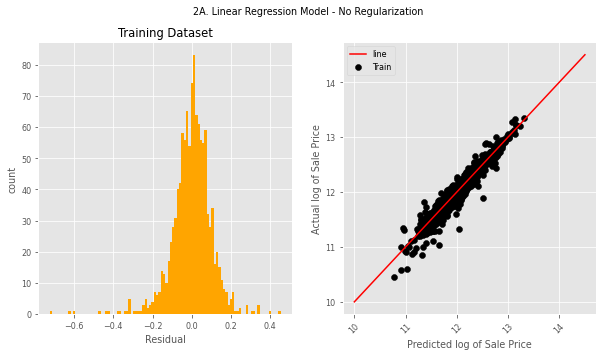

In [41]:
from sklearn.metrics import mean_squared_error
rmse_lm_train = mean_squared_error(y_train, 
                                lm.predict(X_train_scaled), 
                                squared = False)
rmse_lm_test = mean_squared_error(y_test, 
                                lm.predict(X_test_scaled), 
                                squared = False)

print('RMSE Logarithmic Train: ', rmse_lm_train)
print('RMSE Logarithmic Test: ', rmse_lm_test)

# untransforming 
rmse_lm_train_conv = mean_squared_error(np.exp(y_train), 
                                np.exp(lm.predict(X_train_scaled)), 
                                squared = False)
#rmse_lm_test_conv = mean_squared_error(np.exp(y_test), 
#                                np.exp(lm.predict(X_test_scaled)), 
#                                squared = False)

print('RMSE Train: $', rmse_lm_train_conv)
#print('RMSE Test: $', rmse_lm_test_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_lm_train = y_train - lm.predict(X_train_scaled)
residuals_lm_test = y_test - lm.predict(X_test_scaled)

axs[0].hist(residuals_lm_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(lm.predict(X_train_scaled), 
         y_train, color='k')
#axs[1].scatter(lm.predict(X_test_scaled), 
#         y_test, color='magenta') # OVERFITTED

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('2A. Linear Regression Model - No Regularization');

In [42]:
# Looking at why rmse test was blowing up
np.where(np.exp(lm.predict(X_test_scaled))==np.inf)
ypred = lm.predict(X_test_scaled)
ypred[268]

12.650946240633804

In [43]:
r2_log_train_temp = r2_score(y_train, lm.predict(X_train_scaled))
r2_log_test_temp = r2_score(y_test, lm.predict(X_test_scaled))
rmse_log_train_temp = rmse_lm_train
rmse_log_test_temp = rmse_lm_test
rmse_train_temp = rmse_lm_train_conv
rmse_test_temp = np.nan

model_descrp.append('linear regression')
if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
    r2_log_train.append(r2_log_train_temp)
elif r2_log_train_temp > 1:   
    r2_log_train.append(1000)
else:
    r2_log_train.append(-1000)

if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
    r2_log_test.append(r2_log_test_temp)
elif r2_log_test_temp > 1:   
    r2_log_test.append(1000)
else:
    r2_log_test.append(-1000)
    
if rmse_log_train_temp <= 10:
    rmse_log_train.append(rmse_log_train_temp)
elif rmse_log_train_temp > 10:   
    rmse_log_train.append(1000)

if rmse_log_test_temp <= 10:
    rmse_log_test.append(rmse_log_test_temp)
elif rmse_log_test_temp > 10:   
    rmse_log_test.append(1000)
    
rmse_train.append(rmse_train_temp)
rmse_test.append(rmse_test_temp)

In [44]:
pd.Series(lm.coef_, index=X_train.columns)

LotFrontage                5.015911e-03
LotArea                    2.006040e-02
OverallQual                5.957629e-02
MasVnrArea                 6.306424e-03
BsmtFinSF1                 1.127048e-02
BsmtUnfSF                 -1.080657e-02
TotalBsmtSF                5.752865e-02
1stFlrSF                   4.627449e-03
2ndFlrSF                   3.215633e-02
GrLivArea                  7.938047e-02
BsmtFullBath               6.222239e-03
BedroomAbvGr              -7.755568e-03
KitchenAbvGr              -1.059247e-02
TotRmsAbvGrd               1.196423e-02
Fireplaces                 1.007420e-03
GarageCars                 1.171201e-02
GarageArea                 2.131059e-02
WoodDeckSF                 1.157798e-02
OpenPorchSF                6.801114e-03
AgeHome                   -1.513172e-02
YrsSinceRemodel           -2.845237e-02
Num_Bathrms                2.581857e-02
MSSubClass_160            -7.229776e-02
MSSubClass_180             1.560882e-02
MSSubClass_190             3.329383e-02


## Model 2A : Lasso - No Grid Search 

Identifying a range of lambdas to look at in the following grid search.

In [45]:
from sklearn.linear_model import Lasso
lasso  = Lasso()
lasso.set_params(normalize=False)
lasso_scores_train = []
lasso_scores_test  = []

alphas = np.linspace(0.0001,0.05,100)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train_scaled, y_train)  
        coefs_lasso.append(lasso.coef_)
        
        lasso_scores_train.append(lasso.score(X_train_scaled, y_train))
        lasso_scores_test.append(lasso.score(X_test_scaled, y_test))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = PriceFeatures.columns)  
# coefs_lasso.head()

In [46]:
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

lambda =  0.002116161616161616


Text(0, 0.5, '$R^2$')

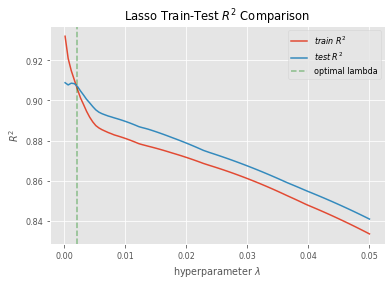

In [47]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')

lasso_underfit = lasso_scores_train < lasso_scores_test
first_underfit  = np.min(alphas[lasso_underfit])
print('lambda = ', first_underfit)
plt.axvline(first_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)

plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

## Model 2B : Lasso - Grid Search

In [64]:
from sklearn.linear_model import Lasso

# Grid Search 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

skfold = KFold(n_splits=3, shuffle=True, random_state=0)
lasso_gs  = Lasso()
lasso_gs.set_params(normalize=False)

params = {
    "alpha": [0.002, 0.003, 0.004, 0.005, 0.007, 0.01]
}

gs = GridSearchCV(lasso_gs, params, scoring = 'r2', cv=skfold)
gs.fit(X_train_scaled, y_train)
gs.cv_results_['mean_test_score']

array([0.89544741, 0.88985073, 0.88559674, 0.88301687, 0.88003208,
       0.87718281])

In [65]:
gs.best_estimator_

Lasso(alpha=0.002)

RMSE Logarithmic Train:  0.12203932990886512
RMSE Logarithmic Test:  0.11621234034105081
RMSE Train: $ 21857.43119009267
RMSE Test: $ 19531.186056606948


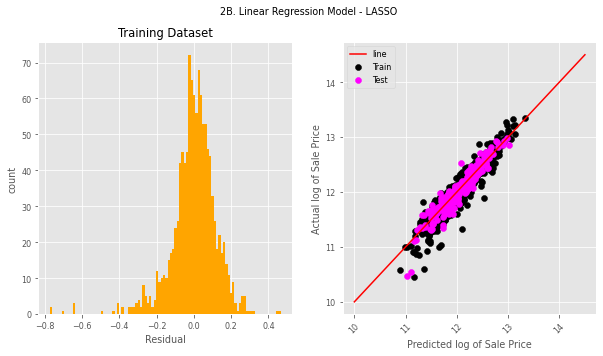

In [66]:
from sklearn.metrics import mean_squared_error
rmse_ls_train = mean_squared_error(y_train, 
                    gs.best_estimator_.predict(X_train_scaled), 
                    squared = False)
rmse_ls_test = mean_squared_error(y_test, 
                    gs.best_estimator_.predict(X_test_scaled), 
                    squared = False)
print('RMSE Logarithmic Train: ', rmse_ls_train)
print('RMSE Logarithmic Test: ', rmse_ls_test)

rmse_ls_train_conv = mean_squared_error(np.exp(y_train), 
                    np.exp(gs.best_estimator_.predict(X_train_scaled)), 
                    squared = False)
rmse_ls_test_conv = mean_squared_error(np.exp(y_test), 
                    np.exp(gs.best_estimator_.predict(X_test_scaled)), 
                    squared = False)
print('RMSE Train: $', rmse_ls_train_conv)
print('RMSE Test: $', rmse_ls_test_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_ls_train = y_train - gs.best_estimator_.predict(X_train_scaled)
residuals_ls_test = y_test - gs.best_estimator_.predict(X_test_scaled)

axs[0].hist(residuals_ls_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(gs.best_estimator_.predict(X_train_scaled), 
         y_train, color='k')
axs[1].scatter(gs.best_estimator_.predict(X_test_scaled), 
         y_test, color='magenta') 

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('2B. Linear Regression Model - LASSO');

In [67]:
r2_score(y_train, gs.best_estimator_.predict(X_train_scaled))

0.906836521861916

In [68]:
r2_log_train_temp = r2_score(y_train, 
                 gs.best_estimator_.predict(X_train_scaled))
r2_log_test_temp = r2_score(y_test, 
                gs.best_estimator_.predict(X_test_scaled))
rmse_log_train_temp = rmse_ls_train
rmse_log_test_temp = rmse_ls_test
rmse_train_temp = rmse_ls_train_conv
rmse_test_temp = rmse_ls_test_conv

model_descrp.append('Lasso')
if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
    r2_log_train.append(r2_log_train_temp)
elif r2_log_train_temp > 1:   
    r2_log_train.append(1000)
else:
    r2_log_train.append(-1000)

if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
    r2_log_test.append(r2_log_test_temp)
elif r2_log_test_temp > 1:   
    r2_log_test.append(1000)
else:
    r2_log_test.append(-1000)
    
if rmse_log_train_temp <= 10:
    rmse_log_train.append(rmse_log_train_temp)
elif rmse_log_train_temp > 10:   
    rmse_log_train.append(1000)

if rmse_log_test_temp <= 10:
    rmse_log_test.append(rmse_log_test_temp)
elif rmse_log_test_temp > 10:   
    rmse_log_test.append(1000)
    
rmse_train.append(rmse_train_temp)
rmse_test.append(rmse_test_temp)

In [53]:
pd.Series(gs.best_estimator_.coef_, index=PriceFeatures.columns)

LotFrontage                0.008871
LotArea                    0.018454
OverallQual                0.093574
MasVnrArea                 0.006881
BsmtFinSF1                 0.024175
BsmtUnfSF                 -0.005575
TotalBsmtSF                0.058053
1stFlrSF                   0.000000
2ndFlrSF                   0.013206
GrLivArea                  0.092763
BsmtFullBath               0.009540
BedroomAbvGr              -0.004066
KitchenAbvGr              -0.014582
TotRmsAbvGrd               0.015037
Fireplaces                 0.010877
GarageCars                 0.020458
GarageArea                 0.021322
WoodDeckSF                 0.009663
OpenPorchSF                0.006516
AgeHome                   -0.017966
YrsSinceRemodel           -0.038795
Num_Bathrms                0.017806
MSSubClass_160            -0.073232
MSSubClass_180            -0.000000
MSSubClass_190            -0.000000
MSSubClass_20              0.006108
MSSubClass_30             -0.071085
MSSubClass_40             -0

In [54]:
gs.best_estimator_.intercept_

11.835553160954394

In [55]:
coefs = pd.DataFrame(
    gs.best_estimator_.coef_,
    columns=["Coefficients"],
    index=PriceFeatures.columns,
)

In [56]:
coefs.head()

,Coefficients
LotFrontage,0.008871
LotArea,0.018454
OverallQual,0.093574
MasVnrArea,0.006881
BsmtFinSF1,0.024175


In [57]:
coefs['Coef_prct'] = (np.exp(coefs['Coefficients'])-1)*100
coefs['Magnitude'] = abs(coefs['Coef_prct'])

In [58]:
coefs.head()

,Coefficients,Coef_prct,Magnitude
LotFrontage,0.008871,0.891023,0.891023
LotArea,0.018454,1.862528,1.862528
OverallQual,0.093574,9.809223,9.809223
MasVnrArea,0.006881,0.690518,0.690518
BsmtFinSF1,0.024175,2.447003,2.447003


In [59]:
coefs_sorted = coefs.sort_values('Coef_prct', ascending = True)
coefs_sorted_nonzero = coefs_sorted.loc[coefs_sorted['Magnitude']>0.5]
coefs_sorted_nonzero = coefs_sorted_nonzero.drop('Magnitude', axis=1)
coefs_sorted_nonzero = coefs_sorted_nonzero.drop('Coefficients', axis=1)
coefs_sorted_nonzero.head(10)

,Coef_prct
MSSubClass_160,-7.061435
MSSubClass_30,-6.861726
Neighborhood_IDOTRR,-4.404229
YrsSinceRemodel,-3.805187
HeatingQC_TA,-2.901302
KitchenQual_TA,-2.016728
Neighborhood_Edwards,-1.961537
AgeHome,-1.780532
KitchenQual_Fa,-1.716431
BsmtFinType1_Unf,-1.455948


In [60]:
#coefs_sorted_nonzero.to_csv('./Data/lasso_coeff.csv')

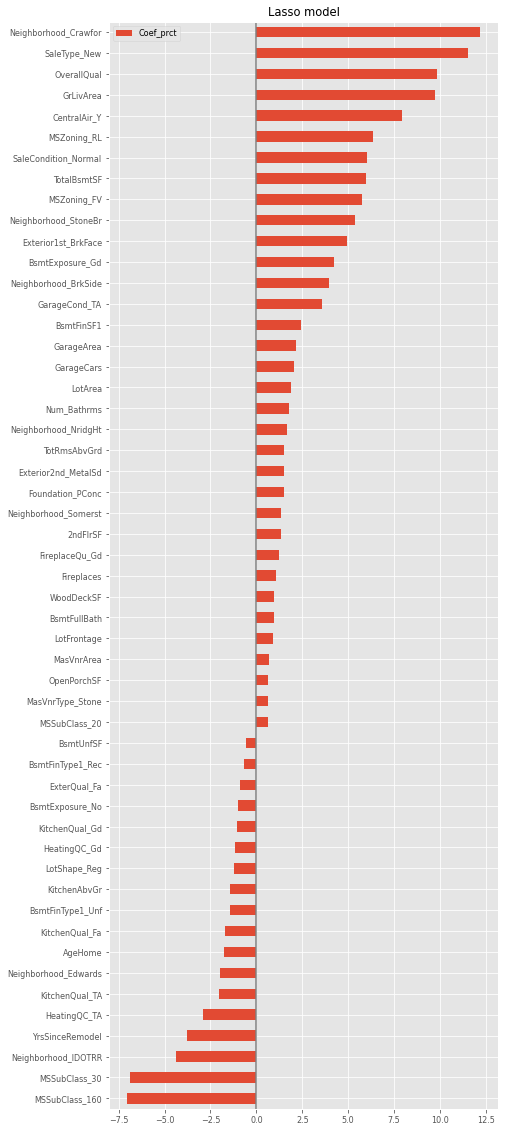

In [61]:
coefs_sorted_nonzero.plot(kind="barh", figsize=(9, 20))
plt.title("Lasso model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

# IV. Compare Model Results

In [62]:
pd.options.display.float_format = '{:,.2f}'.format
zipped = list(zip(model_descrp,
                 rmse_log_train, rmse_log_test, 
                 rmse_train, rmse_test,
                 r2_log_train, r2_log_test))

results = pd.DataFrame(zipped, columns=['model',
                                       'rmse log train',
                                       'rmse log test',
                                       'rmse train',
                                       'rmse test',
                                       'r2 train',
                                       'r2 test'])

#results.head(10)
results_sorted = results.sort_values('rmse log train', ascending = True)
results_sorted.head(10)

,model,rmse log train,rmse log test,rmse train,rmse test,r2 train,r2 test
1,linear regression,0.10,"1,000.00","17,818.78",NaN,0.93,"-1,000.00"
2,Lasso,0.12,0.12,"20,380.64","19,293.26",0.92,0.91
0,baseline/null,0.40,0.38,"79,393.63","72,138.51","-1,000.00","-1,000.00"


(0.0, 150.0)

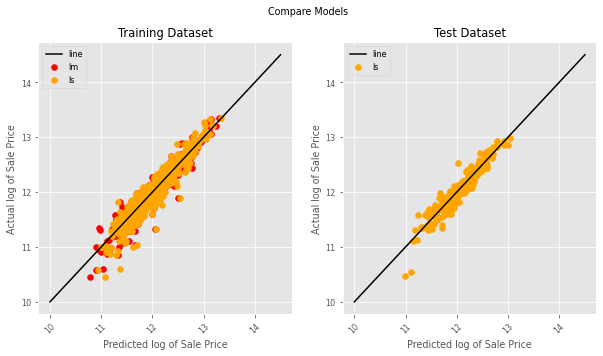

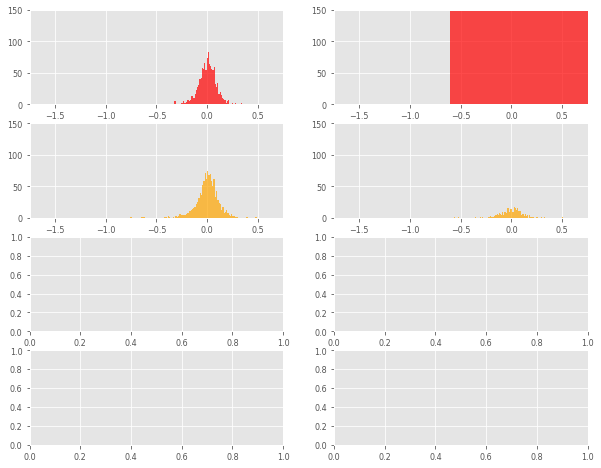

In [63]:
fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[0].plot(x,y, 'k-')
axs[0].scatter(lm.predict(X_train_scaled), 
         y_train, color='red')
axs[0].scatter(gs.best_estimator_.predict(X_train_scaled), 
         y_train, color='orange')
axs[0].set_ylabel('Actual log of Sale Price')
axs[0].set_xlabel('Predicted log of Sale Price')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend(['line','lm','ls'])
axs[0].set_title('Training Dataset')

axs[1].plot(x,y, 'k-')
#axs[1].scatter(lm.predict(X_test_scaled), 
#         y_test, color='red')
axs[1].scatter(gs.best_estimator_.predict(X_test_scaled), 
         y_test, color='orange')
axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','ls'])
axs[1].set_title('Test Dataset')

fig.suptitle('Compare Models');

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
fig2, axs2 = plt.subplots(4,2) 
fig2.set_figheight(8)
fig2.set_figwidth(10)

axs2[0,0].hist(residuals_lm_train,bins=100, 
                    color = 'red', alpha=0.7);
axs2[0,0].set_xlim(-1.75,0.75)
axs2[0,0].set_ylim(0,150)
axs2[1,0].hist(residuals_ls_train,bins=100, 
                    color = 'orange', alpha=0.7);
axs2[1,0].set_xlim(-1.75,0.75)
axs2[1,0].set_ylim(0,150)

axs2[0,1].hist(residuals_lm_test,bins=100, 
                    color = 'red', alpha=0.7);
axs2[0,1].set_xlim(-1.75,0.75)
axs2[0,1].set_ylim(0,150)
axs2[1,1].hist(residuals_ls_test,bins=100, 
                    color = 'orange', alpha=0.7);
axs2[1,1].set_xlim(-1.75,0.75)
axs2[1,1].set_ylim(0,150)

#axs2[0].legend(['lm','ls'])
#axs2[0].set_ylabel('count')
#axs2[0].set_xlabel('Residual')
#axs2[0].set_title('Training Dataset - Residuals')